<a href="https://colab.research.google.com/github/pttrilok/courses/blob/master/Intro%20to%20ML/Lesson%2002%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***In this module we are going o  learn about ***
1. Random Forest
2. Feather-Format
3. Bagging
4. Boosting
5. Curse of Dimensionality
6. No free Lunch theorem
7. Bootstraping Sample
8. Out of Bag Score (OOB Score)

Make  sure you will learn all these by the end of this and this notebook is subjected to update because a lot of theory is not written right now...:)

# ***Installing required version of library***

***Make sure to connect with CPU Runtime***

In [ ]:
!pip install fastai==0.7

     |████████████████████████████████| 122kB 4.7MB/s 
     |████████████████████████████████| 1.5MB 9.5MB/s 
     |████████████████████████████████| 496.4MB 30kB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp36-cp36m-linux_x86_64.whl size=2656227 sha256=a5a2a57cee70c5ac7800d71da6076fe8ef9452062eb0382513aac7c6ee7a3506
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz
ERROR: torchvision 0.7.0+cu101 has requirement torch==1.6.0, but you'll have torch 0.3.1 which is incompatible.
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


# ***Importing required libraries***

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


***Got an error ??***

Don't  panic it's preplanned Just to demonstrate that how error can be fixed by looking into files.

BTW Imputer gave this opportunity to us

***Let's see how to  fix it***


```
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
```
Just copy the above two code lines and open the file where error was recieved
i.e. Structured.py

***But how to find location of the file***

Just look into the error carefully andyou will noyice the location

after opening the file just see the import section there you will  find Imputer is imported just delete that importing ("only Imputer and not others")
and paste the copied lines and press ctrl + s to save the changes..


# ***Data elicitation and preprocessing***

***Creating directory for our data***

In [ ]:
import os 
os.makedirs("Data",exist_ok=True)

In [ ]:
%cd Data

/content/Data


***Downloading our data***

In [ ]:
!curl --header "Host: storage.googleapis.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-GB,en-US;q=0.9,en;q=0.8,hi;q=0.7" --header "Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3316/31070/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1601619735&Signature=pl%2BQEk3nRJQhQke4vASZFo1EqwC%2BLQyFuKKLJx9rCQ3ShzsPaVFa5VAxLc%2BNT%2BbMaMhIXzBT9o78qFo5%2BzePkoGObIXN7Javk4aaH0zi9gE%2F9sHq7j9TmbrEXO%2BRinHMaAegsp3qmR3IcsXNZ1Y66NpbHhMut5wYA6FJqjXbc94BoLHsRTdQPR5g770CRq0EvdfonQeEl5%2Bt%2FXC9mrhwAHcn%2BIrZBZrJP6B7G6RGc0STpoER2ZqTLqD96M05F%2B5awD9wZZ6OP6l8vZw92EqsPEeBYH22M9YvuB93PEF4Q4Y3mZNS2LnUjAZa3fZuOqzWHuewL1C%2BkFVhYikiy0M7mA%3D%3D&response-content-disposition=attachment%3B+filename%3Dbluebook-for-bulldozers.zip" -L -o 'bluebook-for-bulldozers.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 48.4M  100 48.4M    0     0   125M      0 --:--:-- --:--:-- --:--:--  125M


In [ ]:
!unzip "*.zip"

Archive:  bluebook-for-bulldozers.zip
  inflating: Data Dictionary.xlsx    
  inflating: Machine_Appendix.csv    
  inflating: Test.csv                
  inflating: Train.7z                
  inflating: Train.zip               
  inflating: TrainAndValid.7z        
  inflating: TrainAndValid.csv       
  inflating: TrainAndValid.zip       
  inflating: Valid.7z                
  inflating: Valid.csv               
  inflating: Valid.zip               
  inflating: ValidSolution.csv       
  inflating: median_benchmark.csv    
  inflating: random_forest_benchmark_test.csv  


***Choose replace all when prompted in below by Choosing A***

In [ ]:
!unzip "*.zip"

Archive:  Valid.zip
replace Valid.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Valid.csv               

Archive:  TrainAndValid.zip
  inflating: TrainAndValid.csv       

Archive:  bluebook-for-bulldozers.zip
  inflating: Data Dictionary.xlsx    
  inflating: Machine_Appendix.csv    
  inflating: Test.csv                
  inflating: Train.7z                
  inflating: Train.zip               
  inflating: TrainAndValid.7z        
  inflating: TrainAndValid.csv       
  inflating: TrainAndValid.zip       
  inflating: Valid.7z                
  inflating: Valid.csv               
  inflating: Valid.zip               
  inflating: ValidSolution.csv       
  inflating: median_benchmark.csv    
  inflating: random_forest_benchmark_test.csv  

Archive:  Train.zip
  inflating: Train.csv               

4 archives were successfully processed.


In [ ]:
PATH =""

In [ ]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
                     parse_dates=["saledate"])

In [ ]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)
            
display_all(df_raw.transpose())

0       \
SalesID                                                    1139246   
SalePrice                                                    66000   
MachineID                                                   999089   
ModelID                                                       3157   
datasource                                                     121   
auctioneerID                                                     3   
YearMade                                                      2004   
MachineHoursCurrentMeter                                        68   
UsageBand                                                      Low   
saledate                                       2006-11-16 00:00:00   
fiModelDesc                                                   521D   
fiBaseModel                                                    521   
fiSecondaryDesc                                                  D   
fiModelSeries                                                  NaN   
fiModelDescriptor                                              NaN   
ProductSize                                                    NaN   
fiProductClassDesc        Wheel Loader - 110.0 to 120.0 Horsepower   
state                                                      Alabama   
ProductGroup                                                    WL   
ProductGroupDesc                                      Wheel Loader   
Drive_System                                                   NaN   
Enclosure                                               EROPS w AC   
Forks                                          None or Unspecified   
Pad_Type                                                       NaN   
Ride_Control                                   None or Unspecified   
Stick                                                          NaN   
Transmission                                                   NaN   
Turbocharged                                                   NaN   
Blade_Extension                                                NaN   
Blade_Width                                                    NaN   
Enclosure_Type                                                 NaN   
Engine_Horsepower                                              NaN   
Hydraulics                                                 2 Valve   
Pushblock                                                      NaN   
Ripper                                                         NaN   
Scarifier                                                      NaN   
Tip_Control                                                    NaN   
Tire_Size                                      None or Unspecified   
Coupler                                        None or Unspecified   
Coupler_System                                                 NaN   
Grouser_Tracks                                                 NaN   
Hydraulics_Flow                                                NaN   
Track_Type                                                     NaN   
Undercarriage_Pad_Width                                        NaN   
Stick_Length                                                   NaN   
Thumb                                                          NaN   
Pattern_Changer                                                NaN   
Grouser_Type                                                   NaN   
Backhoe_Mounting                                               NaN   
Blade_Type                                                     NaN   
Travel_Controls                                                NaN   
Differential_Type                                         Standard   
Steering_Controls                                     Conventional   

                                                            1       \
SalesID                                                    1139248   
SalePrice                                                    57000   
MachineID                                                   117657   

In [ ]:
df_raw.shape

(401125, 53)

In [ ]:
df_raw.SalePrice = np.log(df_raw.SalePrice)
df_raw.SalePrice

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
401120     9.259131
401121     9.305651
401122     9.350102
401123     9.104980
401124     8.955448
Name: SalePrice, Length: 401125, dtype: float64

# ***First Step to Build Model***

In [ ]:
m = RandomForestRegressor(n_jobs=-1)

In [ ]:
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

ValueError: ignored

In [ ]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, 
                                     infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 
            'Dayofyear', 'Is_month_end', 'Is_month_start', 
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 
            'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [ ]:
fld = df_raw.saledate
fld.dt.year

0         2006
1         2004
2         2004
3         2011
4         2009
          ... 
401120    2011
401121    2011
401122    2011
401123    2011
401124    2011
Name: saledate, Length: 401125, dtype: int64

In [ ]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [ ]:
train_cats(df_raw)
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [ ]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'],
    ordered=True, inplace=True)

In [ ]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [ ]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

In [ ]:
df_raw = pd.read_feather('tmp/bulldozers-raw')

In [ ]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [ ]:
??proc_df

***Trained using CPU***

In [ ]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(df, y)
m.score(df,y)

CPU times: user 18min, sys: 2.66 s, total: 18min 3s
Wall time: 9min 9s


0.9881854062596686

***Trained using GPU***

In [ ]:
# m = RandomForestRegressor(n_jobs=-1)
# %time m.fit(df, y)
# m.score(df,y)

CPU times: user 15min 26s, sys: 2.2 s, total: 15min 28s
Wall time: 7min 53s


0.9881825467946486

In [ ]:
help(m.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.ensemble._forest.RandomForestRegressor instance
    Return the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a
        precomputed kernel matrix or a list of generic objects instead,
        shape = (n_samples, n_samples_fitted),
        where n_samples_fitted is the number of
        samples used in the fitt

In [ ]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

In [ ]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [ ]:
X_train.shape

(389125, 66)

In [ ]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 17min 27s, sys: 758 ms, total: 17min 27s
Wall time: 8min 51s
[0.07562245183672055, 0.2358425156647528, 0.9880481169730596, 0.9006673157751932]


# ***Sppeding things***

In [ ]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [ ]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 41.3 s, sys: 30.9 ms, total: 41.3 s
Wall time: 21 s
[0.09270494051675364, 0.34089534316183745, 0.9813783184017134, 0.7924655917371379]


***Single Tree***

In [ ]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5268698505181042, 0.5819553657134978, 0.39852188211612327, 0.39517835145595104]


In [ ]:
help(print_score)

Help on function print_score in module __main__:

print_score(m)



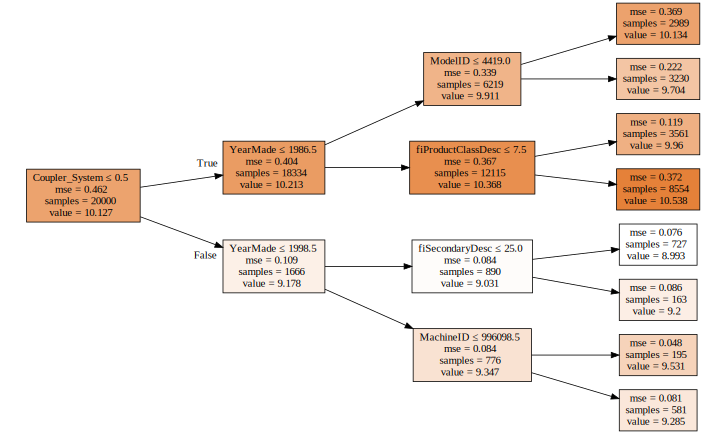

In [ ]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [ ]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[6.526751786450488e-17, 0.4540286388694657, 1.0, 0.6318587610074778]


# ***Bagging***

To learn about bagging in random forests, let's start with our basic model again.

In [ ]:
m = RandomForestRegressor(n_estimators=10,n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.11169307815223083, 0.34426969361412124, 0.9728503335864418, 0.7883367013574095]


We'll grab the predictions for each individual tree, and look at one example.

In [ ]:
len(m.estimators_)

10

In [ ]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([9.10498, 9.10498, 9.30565, 9.04782, 9.04782, 9.5819 , 9.4727 , 9.04782, 9.10498, 9.04782]),
 9.186648445550153,
 9.104979856318357)

In [ ]:
preds.shape

(10, 12000)

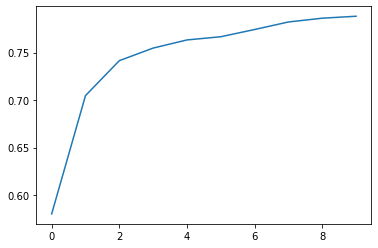

In [ ]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)

In [ ]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.10060639222278367, 0.3423095724644118, 0.97797260555339, 0.7907400765427688]


In [ ]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09676832467282756, 0.33338574637096746, 0.9796212086538487, 0.8015084468633263]


In [ ]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.0934347212330948, 0.3309683083131149, 0.9810010952026424, 0.8043766038526419]


In [ ]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.09703665964061256, 0.33816445690838953, 0.9795080326927502, 0.795777357458029, 0.8552192576692408]


***Reducing overfitting***

***Sub Sampling***

It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: subsampling. Let's return to using our full dataset, so that we can demonstrate the impact of this technique.

In [ ]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a different random subset per tree. That way, given enough trees, the model can still see all the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

In [ ]:
set_rf_samples(20000)

In [ ]:
help(set_rf_samples)

Help on function set_rf_samples in module fastai.structured:

set_rf_samples(n)
    Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.



In [ ]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 15min 25s, sys: 905 ms, total: 15min 26s
Wall time: 7min 56s
[0.07567162524244596, 0.2349823422836033, 0.9880325685252271, 0.9013905739595754, 0.9129815162423033]


Since each additional tree allows the model to see more data, this approach can make additional trees more useful.

In [ ]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07854049083920561, 0.2370118252775973, 0.9871079480101795, 0.8996798890570384, 0.908145890616036]


***Tree building parameters***

***We revert to using a full bootstrap sample in order to show the impact of other over-fitting avoidance methods.***

In [ ]:
reset_rf_samples()

***Let's get a baseline for this full set to compare to.***

In [ ]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [ ]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07833682617518685, 0.23669212011057336, 0.9871747225132014, 0.8999503500456754, 0.9084780890867473]


In [ ]:
t=m.estimators_[0].tree_

In [ ]:
dectree_max_depth(t)

46

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.14070504443678097, 0.23240064138472438, 0.9586234609276333, 0.903545472349404, 0.907017895374587]


In [ ]:
t=m.estimators_[0].tree_

In [ ]:
dectree_max_depth(t)

37

Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with min_samples_leaf) that we require some minimum number of rows in every leaf node. This has two benefits:

There are less decision rules for each leaf node; simpler models should generalize better
The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11493623315243792, 0.2350072996285634, 0.9723911227690484, 0.9013696263417215, 0.9083026728205543]


We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of columns for each split. We do this by specifying max_features, which is the proportion of features to randomly select from at each split.

None

0.5

'sqrt'

1, 3, 5, 10, 25, 100

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11931291918949692, 0.22811555913868622, 0.9702484381722899, 0.907069603390797, 0.9115598907610155]


![](http://scikit-learn.org/stable/_images/sphx_glr_plot_ensemble_oob_001.png)